# Exercício 1 - Alínea a): Geração e Visualização de Distribuições Gaussianas

**Objectivo**: Demonstrar como um algoritmo não-supervisionado consegue "aprender" a distinguir pontos gerados por duas distribuições diferentes sem possuir informação sobre as distribuições que geraram os pontos ou os valores-alvo.

## Passo 1: Importar bibliotecas necessárias

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Definir semente (seed) para reprodutibilidade
np.random.seed(22)

## Passo 2: Gerar o primeiro conjunto de 500 pontos (Conjunto 1)

- **Média**: [3, 3] - centro da distribuição
- **Covariância**: [[1, 0], [0, 1]] - matriz identidade indica variâncias iguais e sem correlação entre as variáveis

In [ ]:
# Parâmetros do primeiro conjunto
mean1 = [3, 3]
cov1 = [[1, 0], [0, 1]]

# Gerar 500 pontos utilizando distribuição Gaussiana multivariada
conjunto1 = np.random.multivariate_normal(mean1, cov1, 500)

print(f"Conjunto 1: {conjunto1.shape[0]} pontos gerados")
print(f"Média real: {np.mean(conjunto1, axis=0)}")
print(f"Covariância real:\n{np.cov(conjunto1.T)}")

Conjunto 1: 500 pontos gerados
Média real: [3.01034952 3.03946823]
Covariância real:
[[ 1.0413805  -0.03472584]
 [-0.03472584  1.17168814]]


## Passo 3: Gerar o segundo conjunto de 500 pontos (Conjunto 2)

- **Média**: [-3, -3] - centro diferente para criar separação
- **Covariância**: [[2, 0], [0, 5]] - maior variância para criar alguma sobreposição com o Conjunto 1

In [ ]:
# Parâmetros do segundo conjunto
mean2 = [-3, -3]
cov2 = [[2, 0], [0, 5]]

# Gerar 500 pontos utilizando distribuição Gaussiana multivariada
conjunto2 = np.random.multivariate_normal(mean2, cov2, 500)

print(f"Conjunto 2: {conjunto2.shape[0]} pontos gerados")
print(f"Média real: {np.mean(conjunto2, axis=0)}")
print(f"Covariância real:\n{np.cov(conjunto2.T)}")

Conjunto 2: 500 pontos gerados
Média real: [-3.08657188 -3.13109711]
Covariância real:
[[1.95553284 0.12527646]
 [0.12527646 4.11312609]]


## Passo 4: Adicionar etiquetas aos conjuntos

Adicionar uma coluna de etiquetas para identificar a que conjunto cada ponto pertence:
- Conjunto 1: etiqueta = 1
- Conjunto 2: etiqueta = 2

In [25]:
# Criar etiquetas para cada conjunto
labels1 = np.ones(500, dtype=int)  # Etiqueta 1 para o primeiro conjunto
labels2 = np.ones(500, dtype=int) * 2  # Etiqueta 2 para o segundo conjunto

# Adicionar etiquetas como terceira coluna
conjunto1_com_labels = np.column_stack((conjunto1, labels1))
conjunto2_com_labels = np.column_stack((conjunto2, labels2))

print(f"Conjunto 1 com labels: {conjunto1_com_labels.shape}")
print(f"Conjunto 2 com labels: {conjunto2_com_labels.shape}")
print(f"\nPrimeiros 3 pontos do Conjunto 1:")
print(conjunto1_com_labels[:3])

Conjunto 1 com labels: (500, 3)
Conjunto 2 com labels: (500, 3)

Primeiros 3 pontos do Conjunto 1:
[[2.90805008 1.53664935 1.        ]
 [4.08179168 2.76067483 1.        ]
 [2.50887086 1.99772799 1.        ]]


## Passo 5: Juntar e baralhar os conjuntos

Concatenar ambos os conjuntos e baralhar aleatoriamente para simular dados não ordenados.

In [26]:
# Concatenar os dois conjuntos
dados_completos = np.concatenate((conjunto1_com_labels, conjunto2_com_labels), axis=0)

print(f"Dados antes de baralhar: {dados_completos.shape}")
print(f"Total de pontos: {dados_completos.shape[0]}")

# Baralhar os dados
np.random.shuffle(dados_completos)

print(f"\nPrimeiros 5 pontos após baralhar:")
print(dados_completos[:5])
print(f"\nDistribuição das etiquetas:")
print(f"Etiqueta 1: {np.sum(dados_completos[:, 2] == 1)} pontos")
print(f"Etiqueta 2: {np.sum(dados_completos[:, 2] == 2)} pontos")

Dados antes de baralhar: (1000, 3)
Total de pontos: 1000

Primeiros 5 pontos após baralhar:
[[ 1.46717855  3.40497889  1.        ]
 [ 3.50807826  4.05335763  1.        ]
 [-6.38783104 -1.97391138  2.        ]
 [ 4.35208046  3.42227205  1.        ]
 [ 3.79518828  3.74218614  1.        ]]

Distribuição das etiquetas:
Etiqueta 1: 500 pontos
Etiqueta 2: 500 pontos


## Passo 6: Visualizar os dados

Criar um gráfico de dispersão usando as duas primeiras colunas (coordenadas x e y), diferenciando os pontos por cores conforme suas etiquetas.

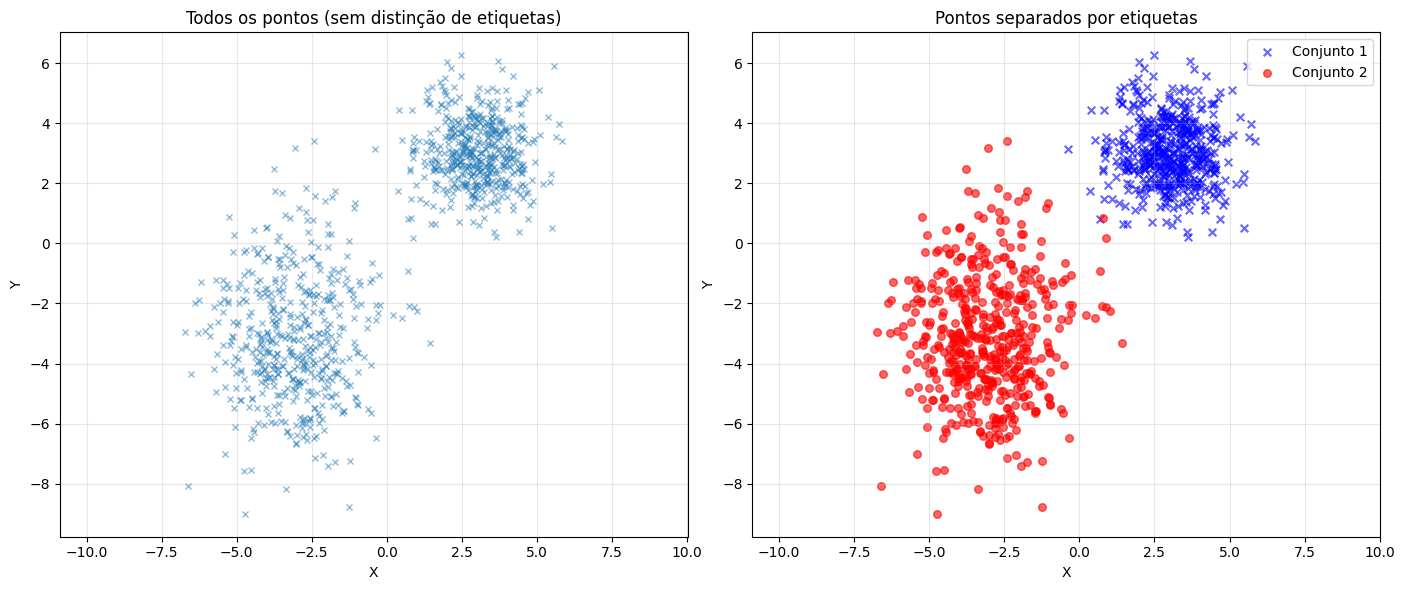


=== Análise de Sobreposição ===
Distância entre centros: 8.49
As distribuições têm centros diferentes ([3, 3] e [-3, -3])
e diferentes covariâncias, criando alguma sobreposição na região intermediária.


In [27]:
# Extrair coordenadas e etiquetas
x = dados_completos[:, 0]
y = dados_completos[:, 1]
labels = dados_completos[:, 2]

# Criar figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Todos os pontos sem distinção de cor (como na Fig. 1)
axes[0].plot(x, y, 'x', alpha=0.5, markersize=4)
axes[0].axis('equal')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].set_title('Todos os pontos (sem distinção de etiquetas)')
axes[0].grid(True, alpha=0.3)

# Subplot 2: Pontos coloridos por etiqueta
conjunto1_mask = labels == 1
conjunto2_mask = labels == 2

axes[1].scatter(x[conjunto1_mask], y[conjunto1_mask], 
                marker='x', alpha=0.6, label='Conjunto 1', s=30, c='blue')
axes[1].scatter(x[conjunto2_mask], y[conjunto2_mask], 
                marker='o', alpha=0.6, label='Conjunto 2', s=30, c='red')
axes[1].axis('equal')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].set_title('Pontos separados por etiquetas')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estatísticas de sobreposição
print("\n=== Análise de Sobreposição ===" )
print(f"Distância entre centros: {np.linalg.norm(np.array(mean1) - np.array(mean2)):.2f}")
print(f"As distribuições têm centros diferentes ({mean1} e {mean2})")
print(f"e diferentes covariâncias, criando alguma sobreposição na região intermediária.")

## Passo 7: Guardar os dados em ficheiro

Guardar o conjunto de dados completo (com etiquetas) em formato CSV para uso posterior.

In [28]:
# Criar DataFrame para melhor organização
df = pd.DataFrame(dados_completos, columns=['X', 'Y', 'Label'])

# Converter etiquetas para inteiro
df['Label'] = df['Label'].astype(int)

# Nome do ficheiro
nome_ficheiro = 'dados_gaussianos.csv'

# Guardar em ficheiro CSV
df.to_csv(nome_ficheiro, index=False)

print(f"Dados guardados em '{nome_ficheiro}'")
print(f"\nPrimeiras 10 linhas do ficheiro:")
print(df.head(10))
print(f"\nResumo estatístico:")
print(df.describe())

Dados guardados em 'dados_gaussianos.csv'

Primeiras 10 linhas do ficheiro:
          X         Y  Label
0  1.467179  3.404979      1
1  3.508078  4.053358      1
2 -6.387831 -1.973911      2
3  4.352080  3.422272      1
4  3.795188  3.742186      1
5  2.731496  2.592455      1
6 -2.700159 -6.333001      2
7  2.783236  3.017118      1
8 -4.533741 -2.283900      2
9  3.094058  4.311935      1

Resumo estatístico:
                 X            Y       Label
count  1000.000000  1000.000000  1000.00000
mean     -0.038111    -0.045814     1.50000
std       3.286240     3.488303     0.50025
min      -6.727960    -9.002821     1.00000
25%      -3.087260    -3.247539     1.00000
50%       0.762004     1.104104     1.50000
75%       3.010488     2.990262     2.00000
max       5.847999     6.265782     2.00000


## Discussão dos Resultados

### Características dos Conjuntos Gerados:

1. **Conjunto 1** (Etiqueta 1):
   - Centro em (3, 3)
   - Variância uniforme (covariância identidade)
   - Distribuição mais compacta e circular

2. **Conjunto 2** (Etiqueta 2):
   - Centro em (-3, -3)
   - Maior variância, especialmente no eixo Y (covariância [[2, 0], [0, 5]])
   - Distribuição mais alongada verticalmente

3. **Sobreposição**:
   - Os centros estão distantes (≈ 8.49 unidades)
   - Existe alguma sobreposição devido à maior variância do Conjunto 2
   - Esta sobreposição simula um cenário realista onde classes não são perfeitamente separáveis

### Adequação ao Objetivo:

O conjunto de dados gerado é apropriado para testar algoritmos de clustering não-supervisionados porque:
- Os dois grupos têm características distintas mas com alguma ambiguidade
- A presença de sobreposição torna o problema mais desafiante e realista
- As etiquetas permitem avaliar a qualidade do clustering posteriormente

### Próximos Passos:

Este dataset será usado para demonstrar como algoritmos não-supervisionados (como K-means ou clustering hierárquico) conseguem identificar estes dois grupos sem acesso às etiquetas durante o treino.